In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

In [99]:
# Use the file namd 'training data' to train the model
df = pd.read_excel('Training data.xlsx')

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   internet    1000 non-null   object 
 1   sex         1000 non-null   object 
 2   traveltime  1000 non-null   int64  
 3   studytime   1000 non-null   int64  
 4   freetime    1000 non-null   int64  
 5   absences    1000 non-null   int64  
 6   age         1000 non-null   int64  
 7   iq          1000 non-null   int64  
 8   marks       1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


**Yay!!! No missing data points**

#### Label Encoding Function

In [101]:
def encoding_fn(df):
  columns_list=list(df.select_dtypes(['object']).columns)

  encoder=LabelEncoder()
  df[columns_list]=df[columns_list].apply(encoder.fit_transform)
  return df

df=encoding_fn(df)
df

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,0,1,2,2,5,6,18,118,73.13
1,1,1,2,2,2,7,19,107,67.78
2,1,1,3,3,3,5,18,108,70.84
3,0,0,3,3,4,9,17,100,66.68
4,1,1,1,4,3,4,19,96,71.88
...,...,...,...,...,...,...,...,...,...
995,1,1,2,1,1,9,18,108,64.12
996,0,1,1,2,2,2,19,109,75.47
997,1,1,2,2,1,5,17,123,76.73
998,1,0,1,3,3,8,17,104,69.07


In [102]:
x_train = np.array(df.iloc[:,0:8])
y_train = np.array(df.iloc[:,8]).reshape(-1,1)

## Plotting Features vs Target Plots

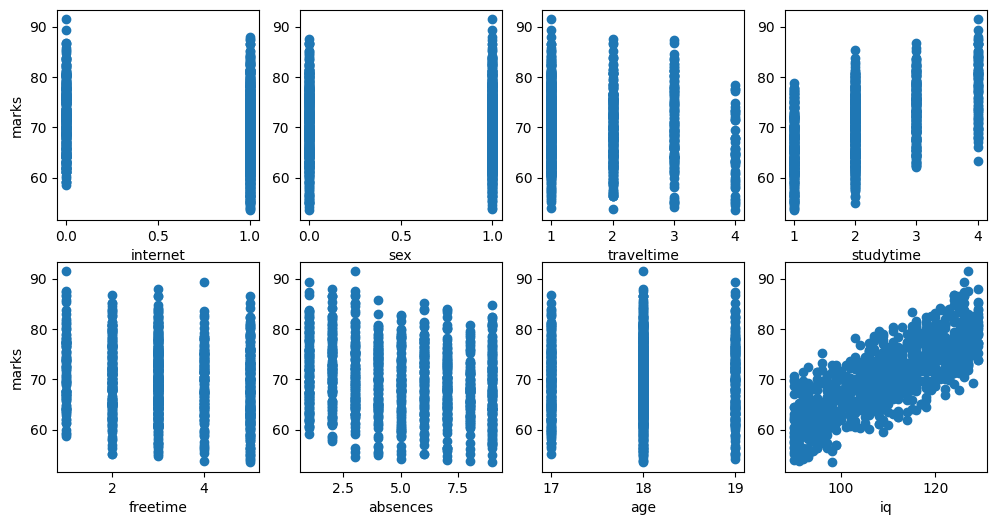

In [103]:
num_features=x_train.shape[1]

fig,ax=plt.subplots(2, 4, figsize=(12, 6))
for i in range(num_features):
  if(i<4):
    ax[0,i].scatter(x_train[:,i],y_train)
    ax[0,i].set_xlabel(df.columns[i])
  else:
    ax[1,i-4].scatter(x_train[:,i],y_train)
    ax[1,i-4].set_xlabel(df.columns[i])
ax[0,0].set_ylabel(df.columns[-1])
ax[1,0].set_ylabel(df.columns[-1])

plt.show()

#### Z-Score Normalization

In [104]:
def z_score(x):
  x_mean=np.mean(x, axis=0)
  x_std=np.std(x, axis=0)

  x_train=(x-x_mean)/x_std
  return x_train,x_std,x_mean

#### Cost Function

In [105]:
def cost(x_train,y_train,w,b):
  n=x_train.shape[0]
  y_hat=np.matmul(x_train,w)+b
  loss=np.sum((y_hat-y_train)**2)
  loss=loss/(2*n)
  return loss

#### Gradient Descent Function

In [106]:
def gradient_descent(x_train,y_train,w,b):
  alpha=0.3
  n=x_train.shape[0]

  y_hat=np.matmul(x_train,w)+b
  err=y_hat-y_train

  dj_dw=np.matmul(np.transpose(x_train),err)/n
  dj_db=(err.sum())/n

  w=w-alpha*dj_dw
  b=b-alpha*dj_db
  return w,b

#### Linear Regression Training

In [107]:
x_train = x_train.astype(np.float64)
x_train,x_mean,x_std = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0
cost_track=[]
iterations=1000

for i in range(iterations):
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
  cost_track.append(old_cost)

#### Plotting Cost vs Iteration

In [108]:
# iter=np.arange(len(cost_track))+1
# plt.scatter(iter, cost_track)

#### Prediction on Test Dataset & Calculating Accuracy

In [109]:
x_predict = pd.read_excel('Test data.xlsx')
x_predict=encoding_fn(x_predict).iloc[:,:8].to_numpy()
x_predict = x_predict.astype(np.float64)
x_predict,_,_=z_score(x_predict)
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.matmul(x_predict,w) + b


accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Optimization required, your accuracy is 72.5%
